In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
%precision 2
warnings.filterwarnings('ignore')

**Importing Libraries**

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**Reading Data**

In [3]:
df=df.rename({'race/ethnicity':'race'},axis=1)
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Renaming Column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race                         1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Datatype of each column**

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Null values of each column**

<AxesSubplot:>

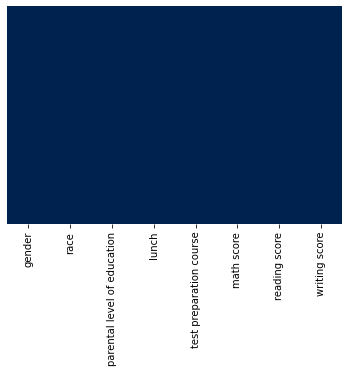

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis',cbar=False)

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

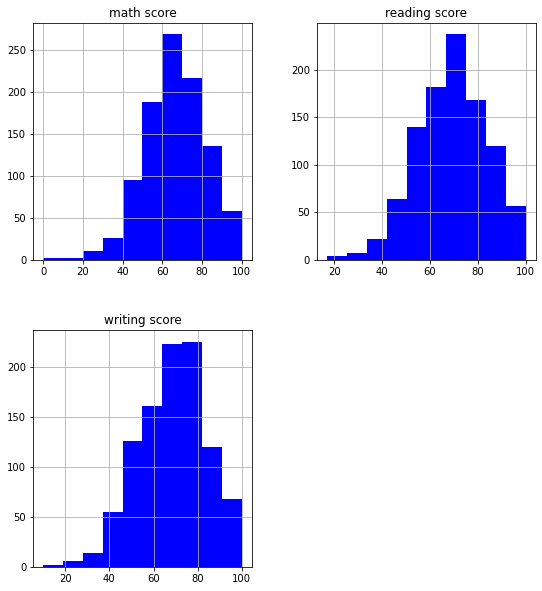

In [8]:
df.hist(figsize=(9,10),color='blue')   

**Histogram on Maths, Reading and Writing score**

In [9]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Correlation between all three subject scores**

<AxesSubplot:>

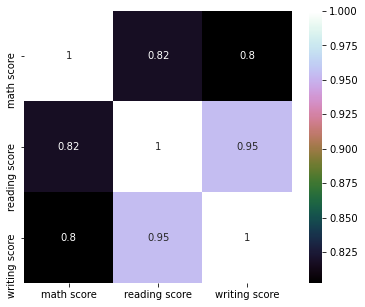

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

**Heatmap on above information**

In [11]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df.head(4)

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148


**Adding all three subject score and storing them into new column**

In [12]:
df[df['Total score']==300]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


**Total Three Students scored 100 in all three subjects and providing their information of each column**

**for eg-   All three students belong to Group E**

In [13]:
df['Total score'].value_counts()

204    15
232    14
198    14
205    13
210    12
       ..
95      1
94      1
93      1
92      1
27      1
Name: Total score, Length: 194, dtype: int64

In [14]:
df['Total score'].nunique()

194

<AxesSubplot:>

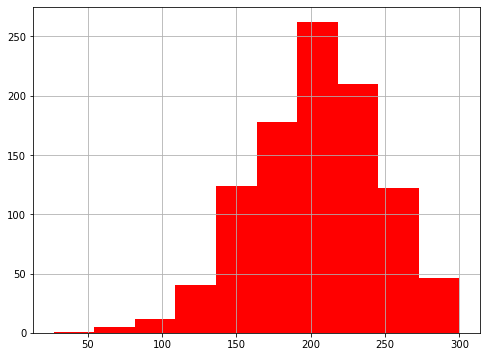

In [15]:
df['Total score'].hist(figsize=(8,6),color='red')

**Histogram on Total score**

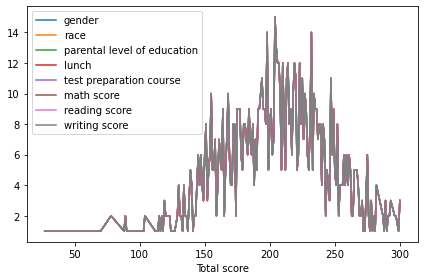

In [16]:
df.groupby(by='Total score').count().plot()
plt.tight_layout()

**groupby countplot on Total score**

# Gender

In [17]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [18]:
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

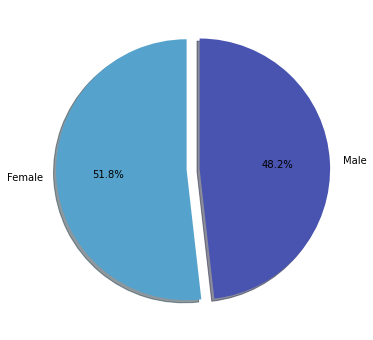

In [19]:
plt.figure(figsize=(15,6))
explode = [0,0.1]
colors = sns.color_palette('icefire')
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'],
colors = colors, autopct = '%0.1f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

**Pie chart on Gender column plotting percentage of Females and Males**

In [20]:
f=df[df['gender']=='female']
f.head(4)

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
5,female,group B,associate's degree,standard,none,71,83,78,232


**Only females information**

In [21]:
f['race'].value_counts()

group C    180
group D    129
group B    104
group E     69
group A     36
Name: race, dtype: int64

**Total count of females in each race group**

In [22]:
f['parental level of education'].value_counts()

some college          118
associate's degree    116
high school            94
some high school       91
bachelor's degree      63
master's degree        36
Name: parental level of education, dtype: int64

**Total count of females of their parents level of education**

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

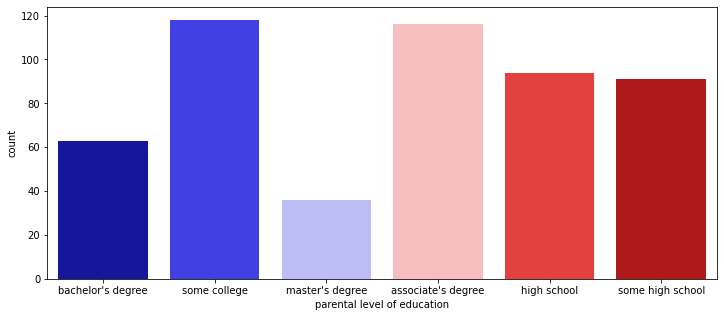

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='parental level of education',data=f,palette='seismic')

**Countplot on above info**

In [24]:
f['lunch'].value_counts()

standard        329
free/reduced    189
Name: lunch, dtype: int64

In [25]:
f['test preparation course'].value_counts()

none         334
completed    184
Name: test preparation course, dtype: int64

In [26]:
f['Total score'].value_counts()

223    9
204    8
218    8
198    8
227    8
      ..
130    1
129    1
127    1
126    1
27     1
Name: Total score, Length: 168, dtype: int64

<AxesSubplot:xlabel='Total score', ylabel='count'>

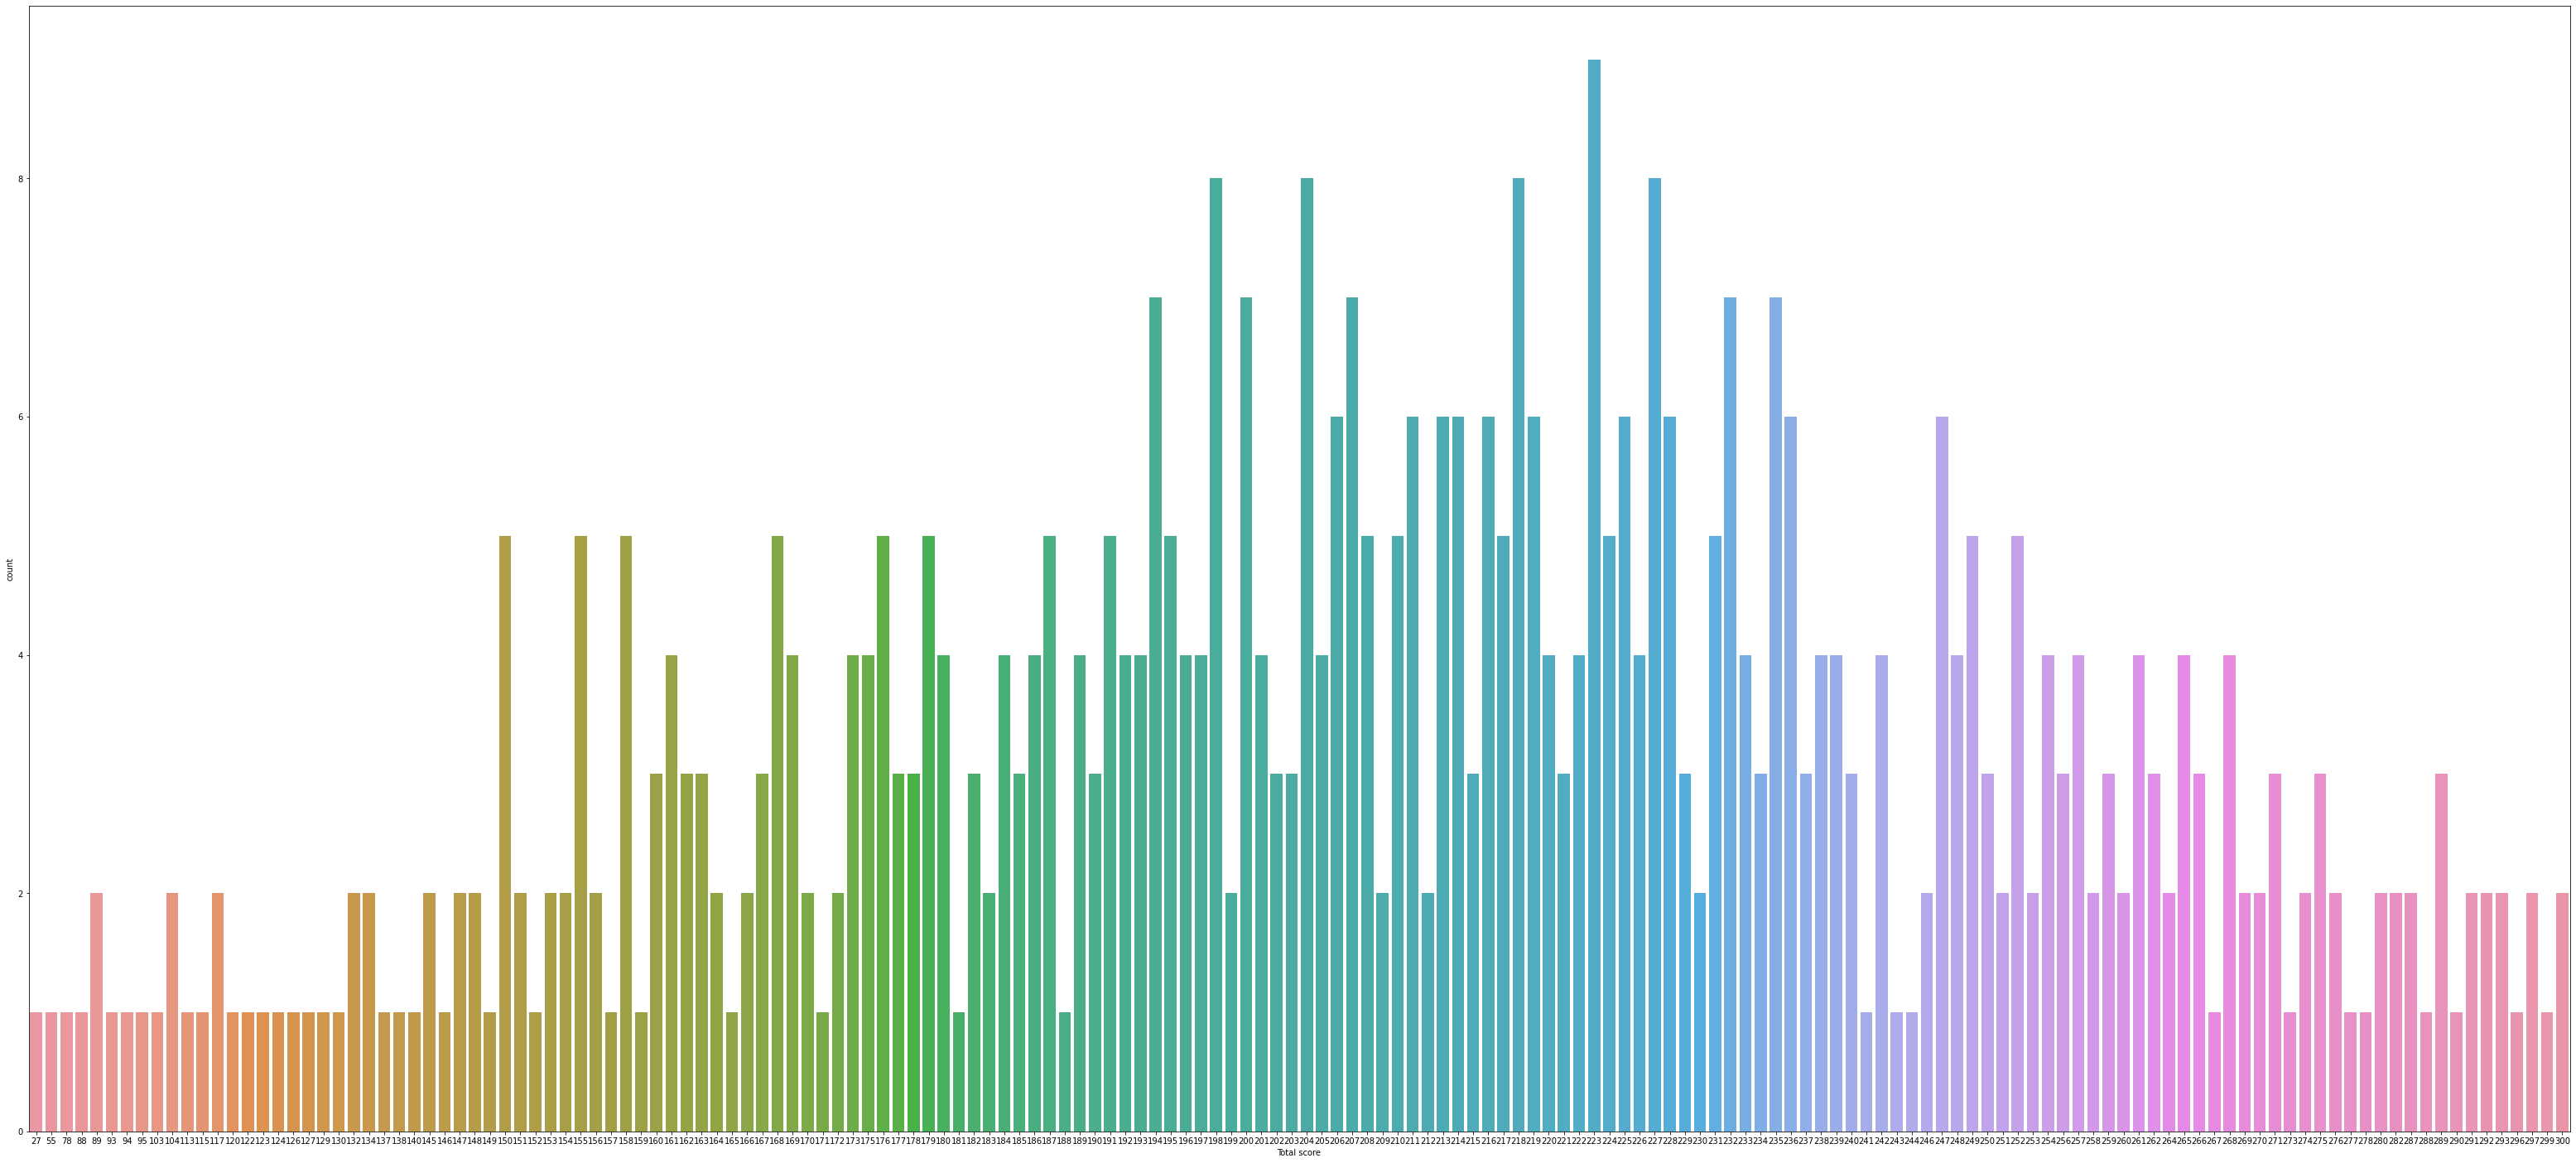

In [27]:
plt.figure(figsize = (55,25))  
sns.countplot(x='Total score',data =f) 

**Countplot on females Total score**

In [28]:
m=df[df['gender']=='male']
m.head(4)

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195


**Only males information**

In [29]:
m['race'].value_counts()

group C    139
group D    133
group B     86
group E     71
group A     53
Name: race, dtype: int64

**Total count of males in each race group**

In [30]:
m['parental level of education'].value_counts()

some college          108
associate's degree    106
high school           102
some high school       88
bachelor's degree      55
master's degree        23
Name: parental level of education, dtype: int64

**Total count of males of their parents level of education**

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

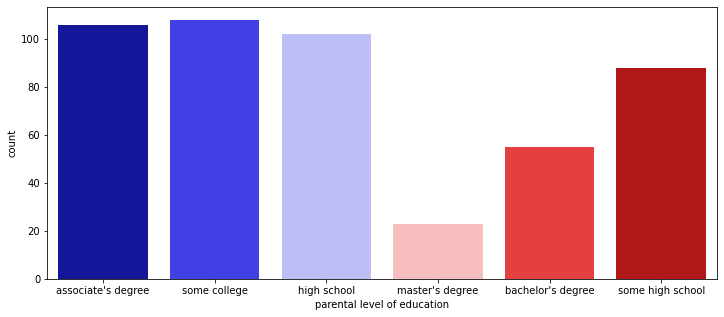

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='parental level of education',data=m,palette='seismic')

**Countplot on above info**

In [32]:
m['lunch'].value_counts()

standard        316
free/reduced    166
Name: lunch, dtype: int64

In [33]:
m['test preparation course'].value_counts()

none         308
completed    174
Name: test preparation course, dtype: int64

In [34]:
m['Total score'].value_counts()

205    9
164    7
181    7
204    7
210    7
      ..
200    1
217    1
233    1
240    1
300    1
Name: Total score, Length: 158, dtype: int64

<AxesSubplot:xlabel='Total score', ylabel='count'>

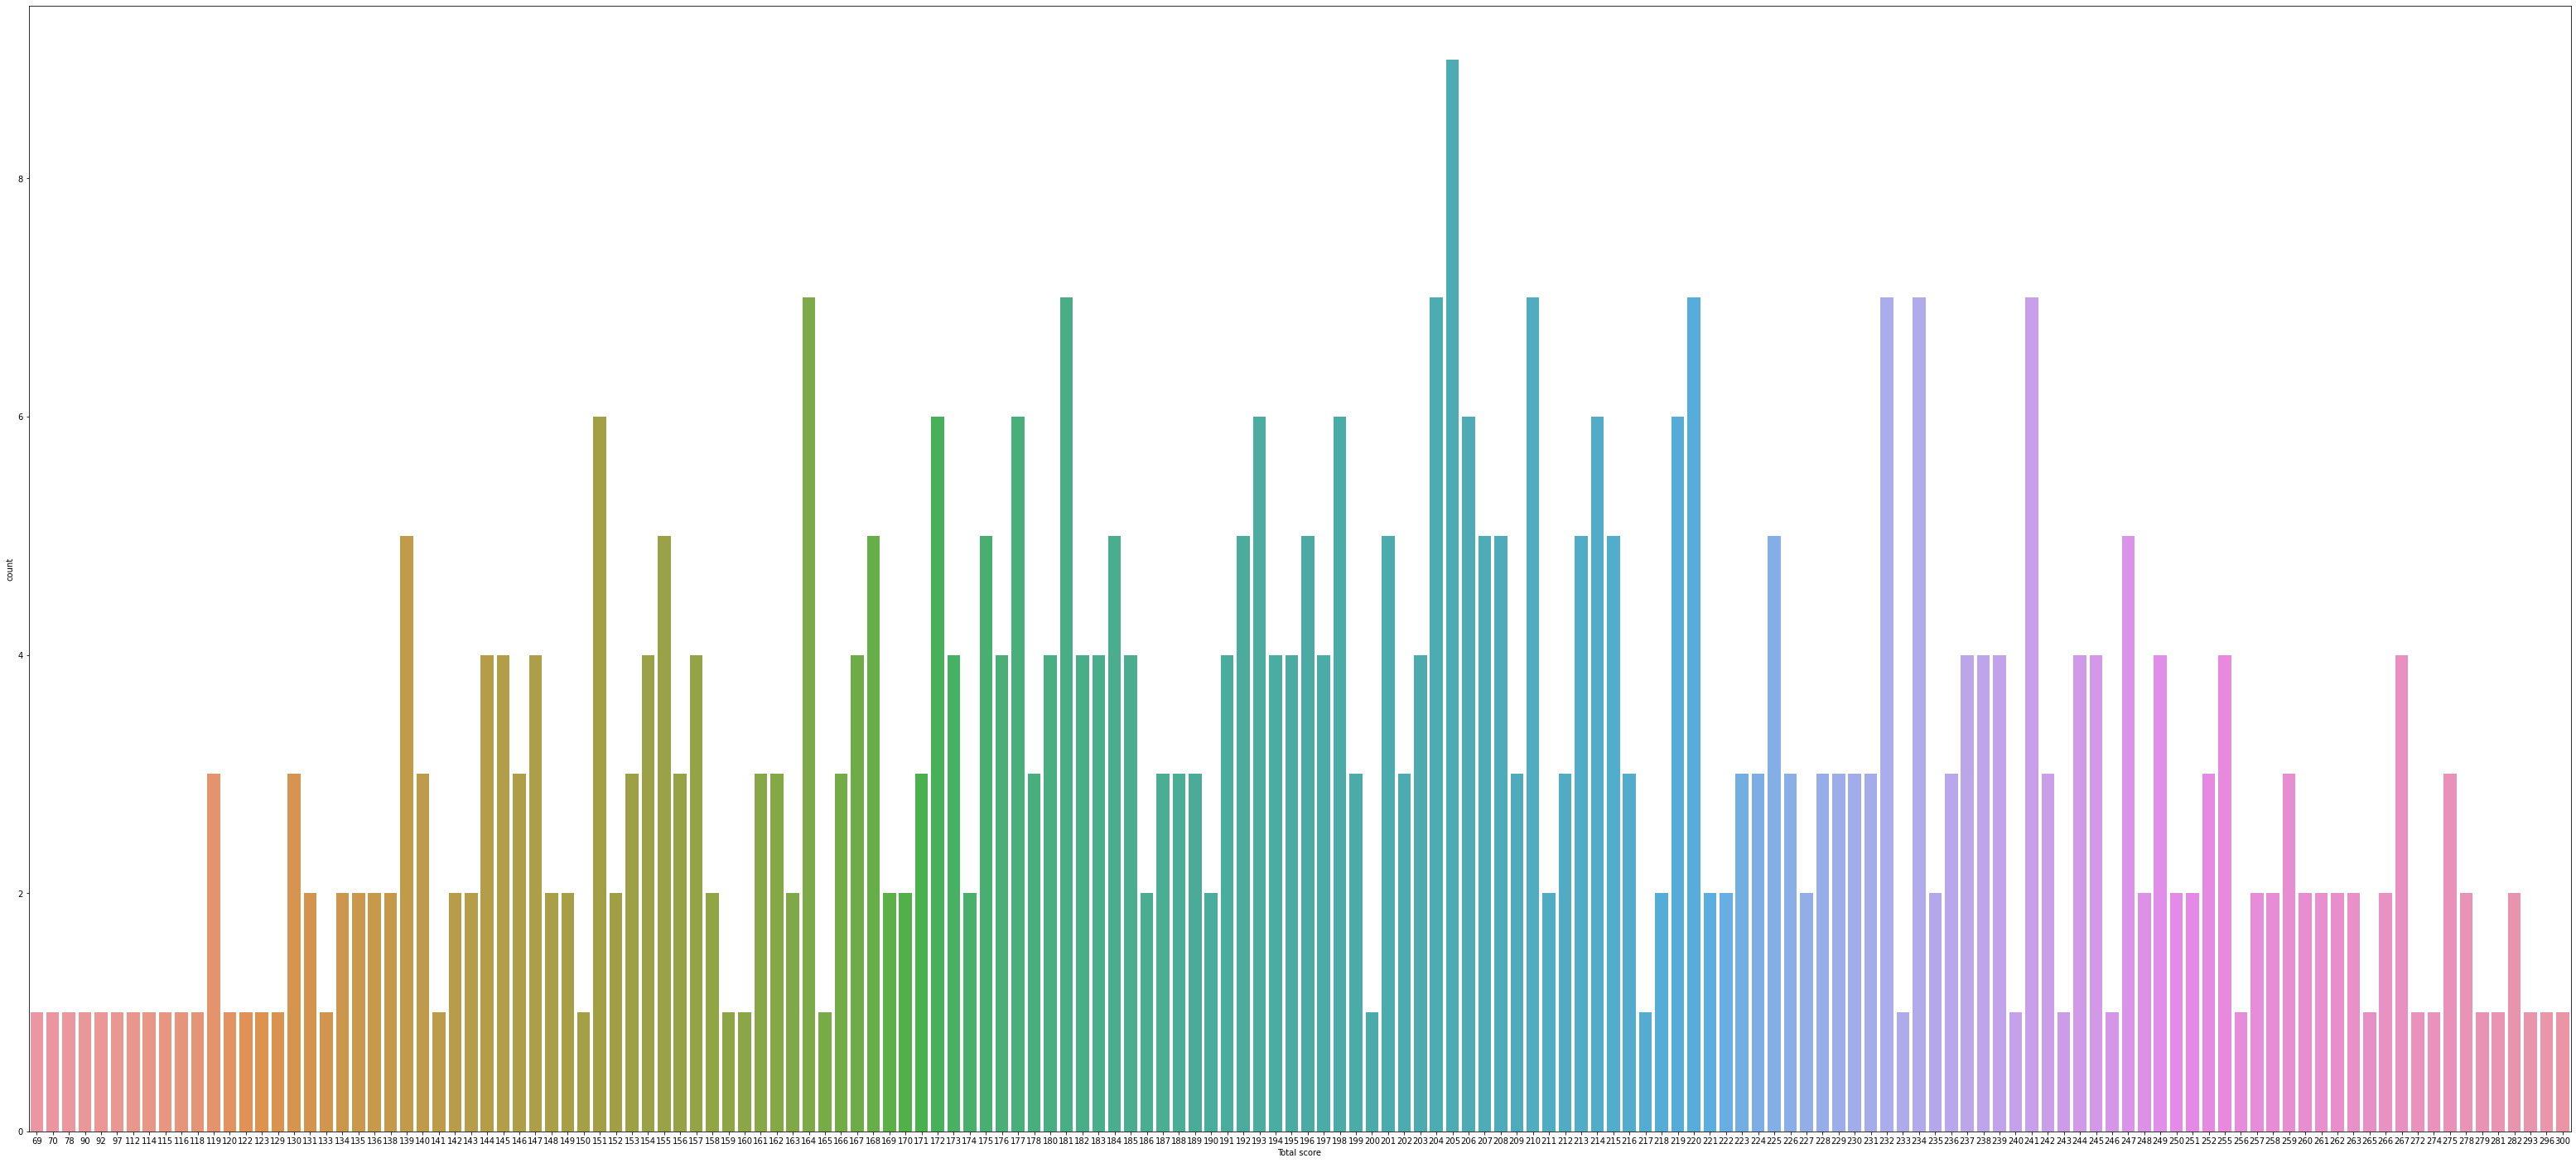

In [35]:
plt.figure(figsize = (55,25))  
sns.countplot(x='Total score',data =m) 

**Countplot on males Total score**

# Race

In [36]:
df['race'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

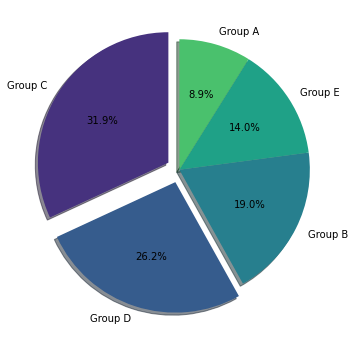

In [37]:
plt.figure(figsize=(15,6))
explode = [0.1,0.1,0,0,0]
colors = sns.color_palette('viridis')
plt.pie(df['race'].value_counts(), labels=['Group C','Group D','Group B','Group E','Group A'],
colors = colors, autopct = '%0.1f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

**Pie chart plotting percentage of each race group**

<AxesSubplot:xlabel='race', ylabel='count'>

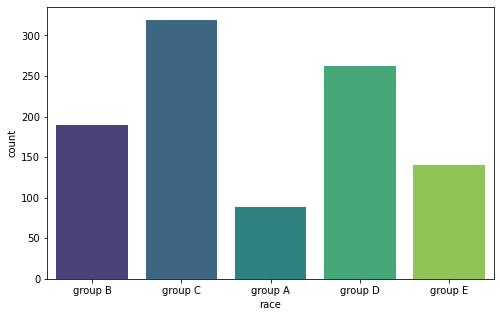

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='race',data=df,palette='viridis')

In [39]:
rc=df[df['race']=='group C']
rc

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
1,female,group C,some college,standard,completed,69,90,88,247
4,male,group C,some college,standard,none,76,78,75,229
10,male,group C,associate's degree,standard,none,58,54,52,164
15,female,group C,some high school,standard,none,69,75,78,222
16,male,group C,high school,standard,none,88,89,86,263
...,...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91,95,94,280
984,female,group C,some high school,standard,none,74,75,82,231
986,female,group C,associate's degree,standard,none,40,59,51,150
996,male,group C,high school,free/reduced,none,62,55,55,172


**Only Group C information**

associate's degree    78
some college          69
high school           64
some high school      49
bachelor's degree     40
master's degree       19
Name: parental level of education, dtype: int64

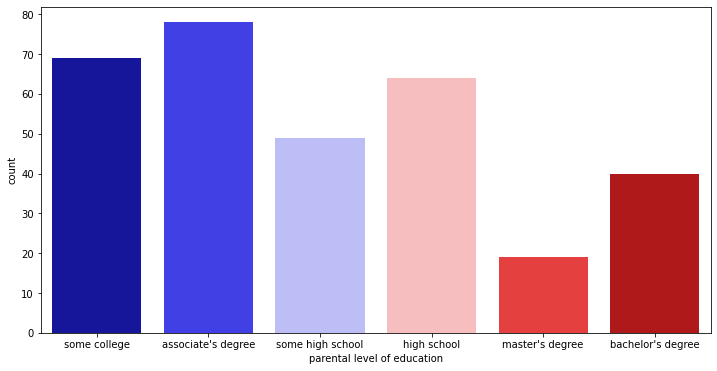

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=rc,palette='seismic')
rc['parental level of education'].value_counts()

**Group C parental level of education value_counts and countplot**

none         202
completed    117
Name: test preparation course, dtype: int64

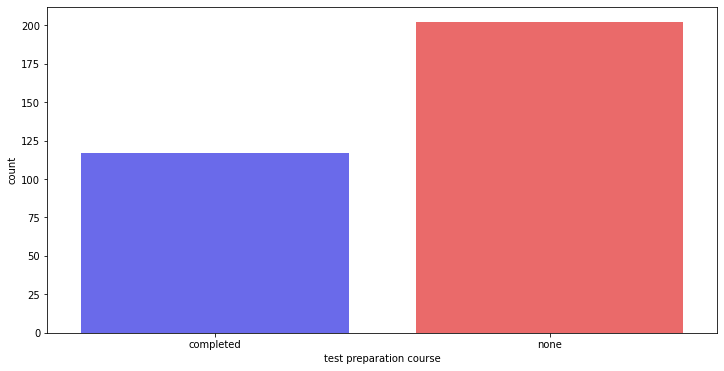

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='test preparation course',data=rc,palette='seismic')
rc['test preparation course'].value_counts()

**Group C --Test preparation course**

In [42]:
rd=df[df['race']=='group D']
rd

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
8,male,group D,high school,free/reduced,completed,64,64,67,195
11,male,group D,associate's degree,standard,none,40,52,43,135
20,male,group D,high school,standard,none,66,69,63,198
22,male,group D,some college,standard,none,44,54,53,151
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,225
...,...,...,...,...,...,...,...,...,...
989,female,group D,some college,free/reduced,completed,67,86,83,236
992,female,group D,associate's degree,free/reduced,none,55,76,76,207
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208
998,female,group D,some college,standard,completed,68,78,77,223


**Group D**

some college          67
associate's degree    50
some high school      50
high school           44
bachelor's degree     28
master's degree       23
Name: parental level of education, dtype: int64

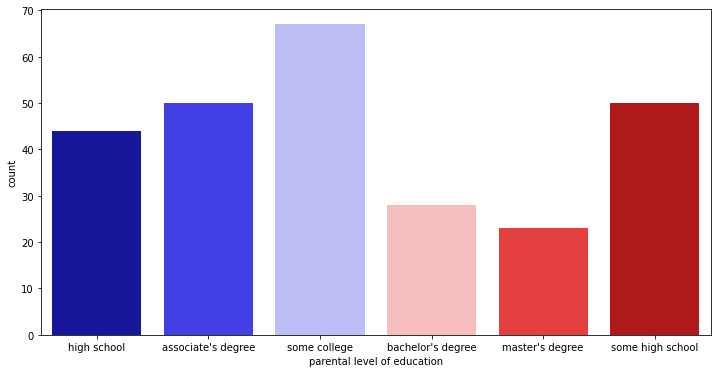

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=rd,palette='seismic')
rd['parental level of education'].value_counts()

**Group D parental level of education value_counts and countplot**

none         180
completed     82
Name: test preparation course, dtype: int64

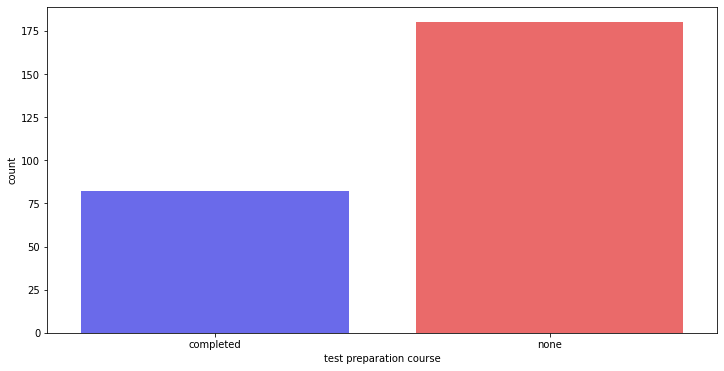

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='test preparation course',data=rd,palette='seismic')
rd['test preparation course'].value_counts()

**Group D --Test preparation course**

In [45]:
rb=df[df['race']=='group B']
rb

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
2,female,group B,master's degree,standard,none,90,95,93,278
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80,239
976,male,group B,some college,free/reduced,completed,60,62,60,182
980,female,group B,high school,free/reduced,none,8,24,23,55
982,male,group B,some high school,standard,completed,79,85,86,250


**Group B**

high school           48
associate's degree    41
some high school      38
some college          37
bachelor's degree     20
master's degree        6
Name: parental level of education, dtype: int64

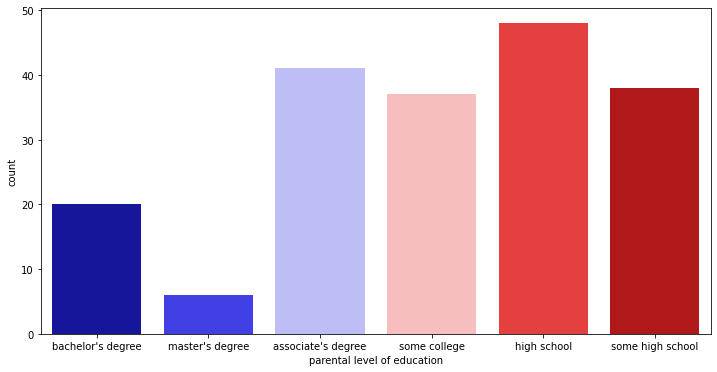

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=rb,palette='seismic')
rb['parental level of education'].value_counts()

**Group B parental level of education value_counts and countplot**

none         122
completed     68
Name: test preparation course, dtype: int64

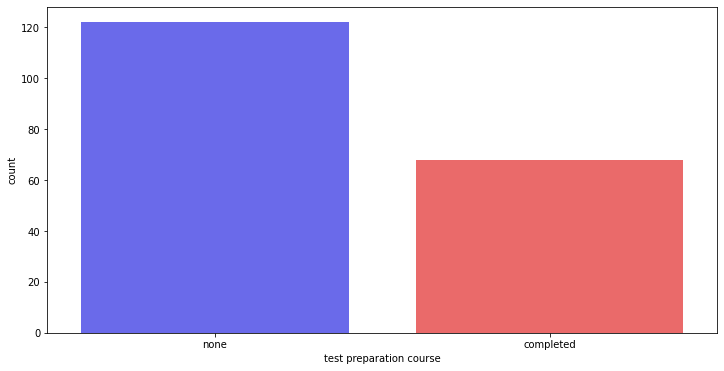

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='test preparation course',data=rb,palette='seismic')
rb['test preparation course'].value_counts()

**Group B --Test preparation course**

In [48]:
re=df[df['race']=='group E']
re

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
32,female,group E,master's degree,free/reduced,none,56,72,65,193
34,male,group E,some college,standard,none,97,87,82,266
35,male,group E,associate's degree,standard,completed,81,81,79,241
44,female,group E,associate's degree,free/reduced,none,50,56,54,160
50,male,group E,some college,standard,none,53,55,48,156
...,...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100,300
968,female,group E,associate's degree,standard,none,68,76,67,211
987,male,group E,some high school,standard,completed,81,75,76,232
990,male,group E,high school,free/reduced,completed,86,81,75,242


**Group E**

associate's degree    39
some college          35
high school           22
some high school      18
bachelor's degree     18
master's degree        8
Name: parental level of education, dtype: int64

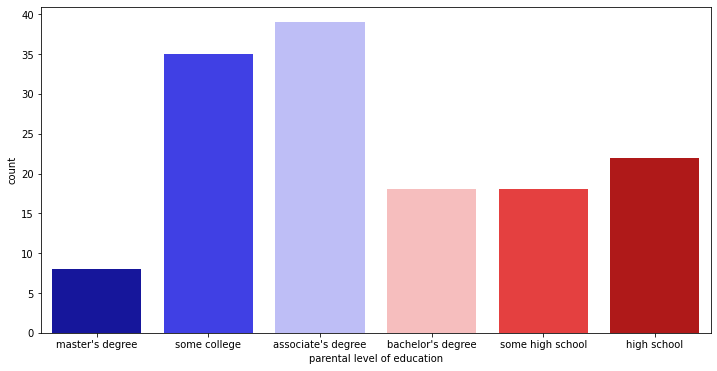

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=re,palette='seismic')
re['parental level of education'].value_counts()

**Group E parental level of education value_counts and countplot**

none         80
completed    60
Name: test preparation course, dtype: int64

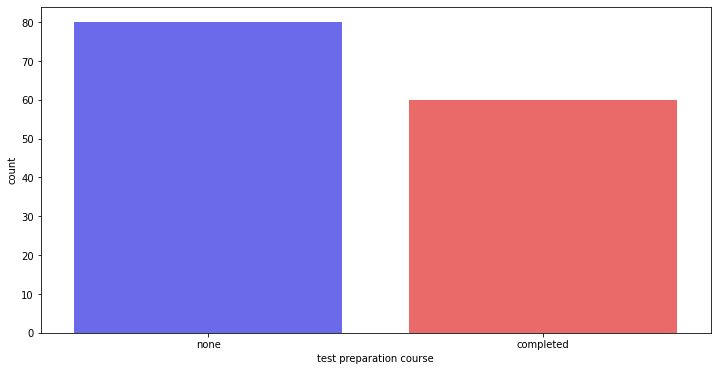

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='test preparation course',data=re,palette='seismic')
re['test preparation course'].value_counts()

**Group E --Test preparation course**

In [51]:
ra=df[df['race']=='group A']
ra

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
13,male,group A,some college,standard,completed,78,72,70,220
14,female,group A,master's degree,standard,none,50,53,58,161
25,male,group A,master's degree,free/reduced,none,73,74,72,219
46,female,group A,associate's degree,standard,completed,55,65,62,182
...,...,...,...,...,...,...,...,...,...
974,female,group A,some college,standard,none,54,63,67,184
983,female,group A,some college,standard,completed,78,87,91,256
985,male,group A,high school,standard,none,57,51,54,162
988,female,group A,some high school,free/reduced,none,44,45,45,134


**Group A**

some high school      24
some college          18
high school           18
associate's degree    14
bachelor's degree     12
master's degree        3
Name: parental level of education, dtype: int64

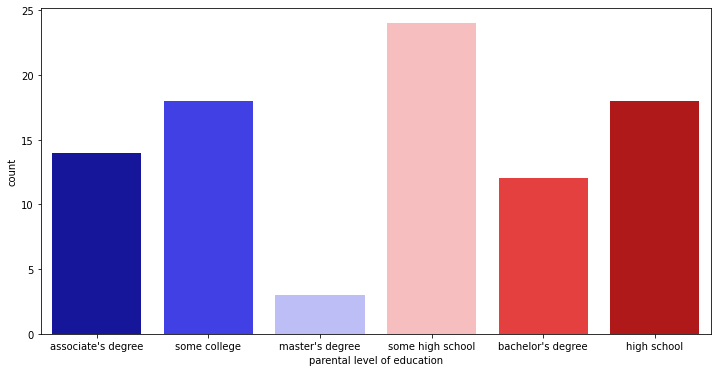

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=ra,palette='seismic')
ra['parental level of education'].value_counts()

**Group A parental level of education value_counts and countplot**

none         58
completed    31
Name: test preparation course, dtype: int64

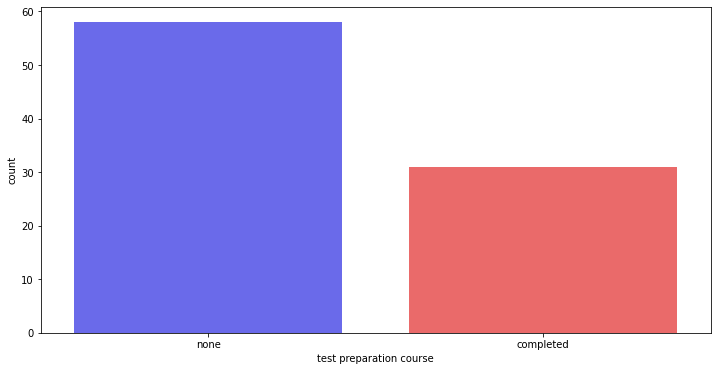

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='test preparation course',data=ra,palette='seismic')
ra['test preparation course'].value_counts()

**Group A --Test preparation course**

# Parental level of education

In [54]:
df['parental level of education'].nunique()

6

In [55]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

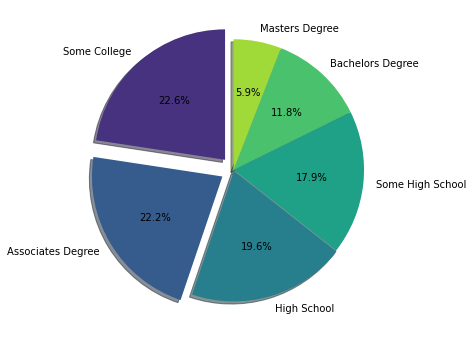

In [56]:
plt.figure(figsize=(15,6))
explode = [0.1,0.1,0.01,0,0,0]
colors = sns.color_palette('viridis')
plt.pie(df['parental level of education'].value_counts(), labels=['Some College','Associates Degree','High School','Some High School','Bachelors Degree','Masters Degree'],
colors = colors, autopct = '%0.1f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

**Pie chart plotting percentage of each parental level of education**

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

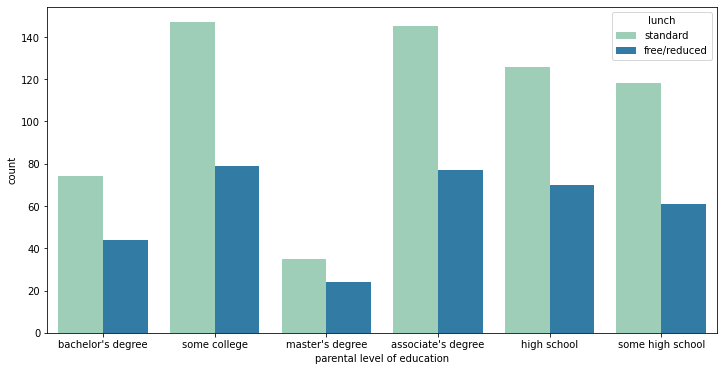

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',hue='lunch',data=df,palette='YlGnBu')

**Countplot on parental level of education with respect to lunch column**

In [58]:
byparent= df.groupby(by='parental level of education').count()
byparent

,gender,race,lunch,test preparation course,math score,reading score,writing score,Total score
parental level of education,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179


**Count of parental level of education with respect to each column**

<AxesSubplot:xlabel='parental level of education'>

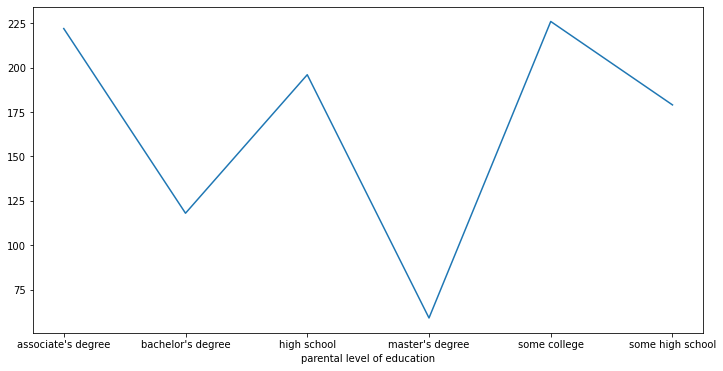

In [59]:
plt.figure(figsize=(12,6))
byparent['Total score'].plot()

# Lunch

In [60]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

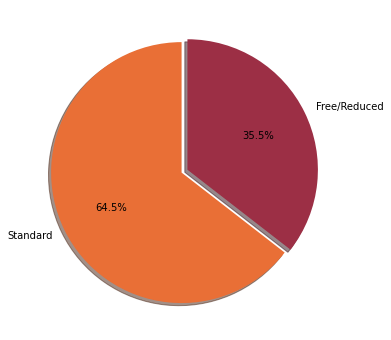

In [61]:
plt.figure(figsize=(15,6))
explode = [0.05,0]
colors = sns.color_palette('icefire_r')
plt.pie(df['lunch'].value_counts(), labels=['Standard', 'Free/Reduced'],
colors = colors, autopct = '%0.1f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

**Pie chart plotting percentage of Standard and Reduced Lunch**

In [62]:
bylunch=df.groupby(by='lunch').count()
bylunch

,gender,race,parental level of education,test preparation course,math score,reading score,writing score,Total score
lunch,,,,,,,,
free/reduced,355,355,355,355,355,355,355,355
standard,645,645,645,645,645,645,645,645


**Count of Lunch column with respect to each column**

<AxesSubplot:xlabel='lunch'>

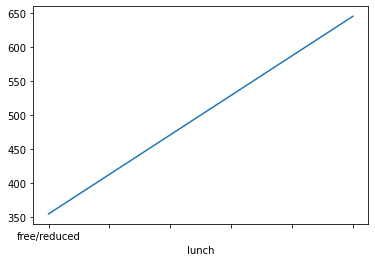

In [63]:
bylunch['Total score'].plot()

# Test preparation course	

In [64]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

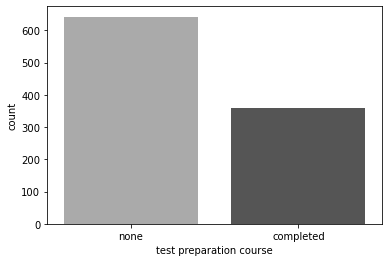

In [65]:
sns.countplot(x='test preparation course',data=df,palette='gist_yarg')

**Countplot on test preparation course column**

# Math score, Reading score, Writing score

In [66]:
df['math score'].value_counts()

65    36
62    35
69    32
59    32
61    27
      ..
24     1
26     1
28     1
33     1
0      1
Name: math score, Length: 81, dtype: int64

In [67]:
df[df['math score']==100]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
451,female,group E,some college,standard,none,100,92,97,289
458,female,group E,bachelor's degree,standard,none,100,100,100,300
623,male,group A,some college,standard,completed,100,96,86,282
625,male,group D,some college,standard,completed,100,97,99,296
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


**All information of students who scored 100 in maths**

In [68]:
df['reading score'].value_counts()

72    34
74    33
64    32
67    30
73    30
      ..
26     1
32     1
40     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

In [69]:
df[df['reading score']==100]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
106,female,group D,master's degree,standard,none,87,100,100,287
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
179,female,group D,some high school,standard,completed,97,100,100,297
381,male,group C,associate's degree,standard,completed,87,100,95,282
458,female,group E,bachelor's degree,standard,none,100,100,100,300
546,female,group A,some high school,standard,completed,92,100,97,289
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292
594,female,group C,bachelor's degree,standard,completed,92,100,99,291


**All information of students who scored 100 in reading subject**

In [70]:
df['writing score'].value_counts()

74    35
70    33
68    31
73    28
80    27
      ..
23     1
28     1
35     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64

In [71]:
df[df['writing score']==100]

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
106,female,group D,master's degree,standard,none,87,100,100,287
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
179,female,group D,some high school,standard,completed,97,100,100,297
377,female,group D,master's degree,free/reduced,completed,85,95,100,280
403,female,group D,high school,standard,completed,88,99,100,287
458,female,group E,bachelor's degree,standard,none,100,100,100,300
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292
685,female,group E,master's degree,standard,completed,94,99,100,293
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293


**All information of students who scored 100 in writing subject**

In [72]:
ms= pd.DataFrame(df['math score'].value_counts())
rs= pd.DataFrame(df['reading score'].value_counts())
ws= pd.DataFrame(df['writing score'].value_counts())

**Converting All subject score in dataframe and storing them in particular variable**

TypeError: pie() missing 1 required positional argument: 'x'

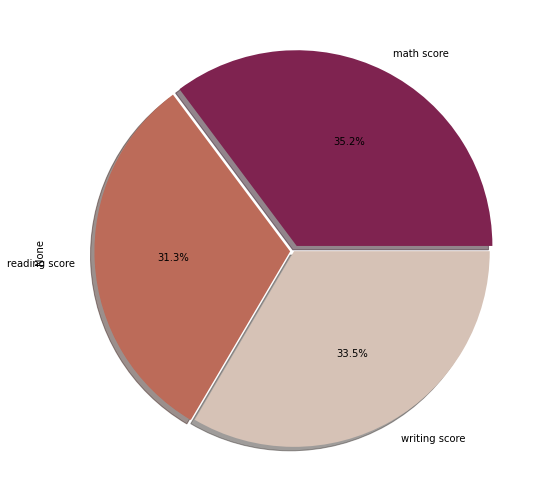

In [73]:
mrs=pd.concat([ms,rs,ws], axis=1).count().plot(kind='pie',figsize=(10,9),autopct='%0.1f%%',explode=[0.03,0.02,0],shadow='True',colors=sns.color_palette('twilight_shifted_r'))
plt.pie()

**Pie chart plotting percentage of all three subject score**

**Concatenated all three subjects score**

# Conclusion